# This notebook is for the Capstone Project

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_row', 300)

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Import Packages

In [2]:

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install geocoder

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


# Create a map with all the pinpoints to be considered

In [3]:
df_pinpt = pd.DataFrame()
df_pinpt

""


In [4]:
list_Neighbourhood=list(['Central'])*10 + list(['Causeway Bay'])*10 + list(['Mongkok'])*10

list_District=list(['Central ']) + list(['Causeway Bay ']) + list(['Mongkok '])
num=[str(i+1) for i in range(10)]
list_District=[x + num[i]  for x in list_District for i in range(10)]
list_District

['Central 1',
 'Central 2',
 'Central 3',
 'Central 4',
 'Central 5',
 'Central 6',
 'Central 7',
 'Central 8',
 'Central 9',
 'Central 10',
 'Causeway Bay 1',
 'Causeway Bay 2',
 'Causeway Bay 3',
 'Causeway Bay 4',
 'Causeway Bay 5',
 'Causeway Bay 6',
 'Causeway Bay 7',
 'Causeway Bay 8',
 'Causeway Bay 9',
 'Causeway Bay 10',
 'Mongkok 1',
 'Mongkok 2',
 'Mongkok 3',
 'Mongkok 4',
 'Mongkok 5',
 'Mongkok 6',
 'Mongkok 7',
 'Mongkok 8',
 'Mongkok 9',
 'Mongkok 10']

In [5]:
list_Longitude=[114.1597279-i/700 for i in range(10)] + [114.1849181-i/700 for i in range(10)]\
+[114.1704562]*4 + [114.1704562-i/1000 for i in range(1,4)] + [114.1704562-i/500 for i in range(1,4)]
list_Latitude=[22.2797463]*4 + [22.2797463+i/500 for i in range(1,4)] + [22.2797463+i/400 for i in range(1,4)]\
+[22.2802088]*4 + [22.2802088+i/5000 for i in range(1,4)] + [22.2802088-i/1000 for i in range(1,4)]\
+[22.3156068+i/1000 for i in range(10)]

In [6]:
df_pinpt['Neighbourhood']=list_Neighbourhood
df_pinpt['District']=list_District
df_pinpt['Latitude']=list_Latitude
df_pinpt['Longitude']=list_Longitude

In [7]:
df_pinpt

,Neighbourhood,District,Latitude,Longitude
0,Central,Central 1,22.279746,114.159728
1,Central,Central 2,22.279746,114.158299
2,Central,Central 3,22.279746,114.156871
3,Central,Central 4,22.279746,114.155442
4,Central,Central 5,22.281746,114.154014
5,Central,Central 6,22.283746,114.152585
6,Central,Central 7,22.285746,114.151156
7,Central,Central 8,22.282246,114.149728
8,Central,Central 9,22.284746,114.148299
9,Central,Central 10,22.287246,114.146871


## Plot the pinpoints on map

In [8]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 

map_hk = folium.Map(location=[df_pinpt['Latitude'][0]+1/80, df_pinpt['Longitude'][0]+1/500], zoom_start=13)

# add markers to map
for lat, lng, district in zip(df_pinpt['Latitude'], df_pinpt['Longitude'], df_pinpt['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk)  
    
map_hk

# Counting the number of restaurants/cafes/eateries for each pinpoint

In [9]:
#Foursquare credential

CLIENT_ID = 'CJFJPLC3JQ2CJNM20O5HS0A2E2E0OWAM2MBWZMK5CW22LDOU' # your Foursquare ID
CLIENT_SECRET = '1DRLFJPNLA3CQMLOKPTIVPUOWKVQ3US1MSELXJ13W1YHJ2OI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CJFJPLC3JQ2CJNM20O5HS0A2E2E0OWAM2MBWZMK5CW22LDOU
CLIENT_SECRET:1DRLFJPNLA3CQMLOKPTIVPUOWKVQ3US1MSELXJ13W1YHJ2OI


### Function for getting restaurants

In [10]:
LIMIT=100 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
         #   lat, 
         #   lng, 
            v['venue']['name'], 
         #   v['venue']['location']['lat'], 
         #   v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])   
    nearby_venues.columns = ['District', 
        #          'Neighborhood Latitude', 
        #          'Neighborhood Longitude', 
                  'Venue', 
        #          'Venue Latitude', 
        #          'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:

HK_venues = getNearbyVenues(names=df_pinpt['District'],
                                   latitudes=df_pinpt['Latitude'],
                                   longitudes=df_pinpt['Longitude']
                                  )



Central 1
Central 2
Central 3
Central 4
Central 5
Central 6
Central 7
Central 8
Central 9
Central 10
Causeway Bay 1
Causeway Bay 2
Causeway Bay 3
Causeway Bay 4
Causeway Bay 5
Causeway Bay 6
Causeway Bay 7
Causeway Bay 8
Causeway Bay 9
Causeway Bay 10
Mongkok 1
Mongkok 2
Mongkok 3
Mongkok 4
Mongkok 5
Mongkok 6
Mongkok 7
Mongkok 8
Mongkok 9
Mongkok 10


In [12]:
HK_venues['Venue Category'].value_counts()

Japanese Restaurant                118
Chinese Restaurant                 110
Coffee Shop                         97
Hotel                               91
Cantonese Restaurant                81
Café                                74
Cha Chaan Teng                      68
Noodle House                        58
Italian Restaurant                  57
Dessert Shop                        55
Bakery                              52
Steakhouse                          47
French Restaurant                   46
Sushi Restaurant                    43
Bar                                 42
Vegetarian / Vegan Restaurant       41
Hong Kong Restaurant                38
Cocktail Bar                        37
Dim Sum Restaurant                  36
Lounge                              35
Gym / Fitness Center                32
Beer Bar                            31
Thai Restaurant                     31
Shopping Mall                       30
Vietnamese Restaurant               30
Dumpling Restaurant      

In [13]:
# Keep only restaurants/cafes/eateries

HK_venues.head()

,District,Venue,Venue Category
0,Central 1,The Murray Hong Kong (香港美利酒店),Hotel
1,Central 1,Mott 32 (卅二公館),Dim Sum Restaurant
2,Central 1,Sift Patisserie,Cupcake Shop
3,Central 1,Mandarin Oriental Hong Kong (香港文華東方酒店),Hotel
4,Central 1,Mandarin Grill + Bar (文華扒房＋酒吧),Steakhouse


In [14]:
HK_venues=HK_venues[HK_venues['Venue Category'].str.contains("Restaurant|Café|Coffee|Steakhouse|Bar|Tea|Cha Chaan Teng|\
Dessert|Food & Drink Shop|Burger|Bistro|Cupcake")]




df_HK_Venue_Cnt=HK_venues.groupby('District').count()
df_HK_Venue_Cnt.head()

,Venue,Venue Category
District,,
Causeway Bay 1,44,44
Causeway Bay 10,67,67
Causeway Bay 2,53,53
Causeway Bay 3,62,62
Causeway Bay 4,61,61


In [15]:
df_HK_Venue_Cnt.reset_index(inplace=True)
df_HK_Venue_Cnt.rename(columns={'Venue': 'Restaurant_Cnt'}, inplace=True)
df_HK_Venue_Cnt.drop('Venue Category', axis=1, inplace=True)
df_HK_Venue_Cnt.head()

,District,Restaurant_Cnt
0,Causeway Bay 1,44
1,Causeway Bay 10,67
2,Causeway Bay 2,53
3,Causeway Bay 3,62
4,Causeway Bay 4,61


In [16]:
HK_Cuisine=('Chinese|Cantonese|Cha Chaan Teng|Hong Kong|Seafood')
Cafe=('Café|Coffee')

HK_venues['HK_Cuisine']=np.where(HK_venues['Venue Category'].str.contains(HK_Cuisine)==True, 1, 0)
HK_venues['Cafe']=np.where(HK_venues['Venue Category'].str.contains(Cafe)==True, 1, 0)

df_HK_Cuisine=HK_venues[['District', 'HK_Cuisine']].loc[HK_venues['HK_Cuisine']==1].groupby('District').count()
df_HK_Cafe=HK_venues[['District', 'Cafe']].loc[HK_venues['Cafe']==1].groupby('District').count()

## Merge with df_pinpt for coordinates 

In [17]:
df_pinpt=df_pinpt.merge(df_HK_Venue_Cnt, how='inner', left_on='District', right_on='District')
df_pinpt

,Neighbourhood,District,Latitude,Longitude,Restaurant_Cnt
0,Central,Central 1,22.279746,114.159728,54
1,Central,Central 2,22.279746,114.158299,55
2,Central,Central 3,22.279746,114.156871,54
3,Central,Central 4,22.279746,114.155442,60
4,Central,Central 5,22.281746,114.154014,70
5,Central,Central 6,22.283746,114.152585,74
6,Central,Central 7,22.285746,114.151156,73
7,Central,Central 8,22.282246,114.149728,73
8,Central,Central 9,22.284746,114.148299,49
9,Central,Central 10,22.287246,114.146871,37


In [18]:
df_pinpt=df_pinpt.merge(df_HK_Cuisine, how='inner', left_on='District', right_on='District')
df_pinpt=df_pinpt.merge(df_HK_Cafe, how='inner', left_on='District', right_on='District')
df_pinpt

,Neighbourhood,District,Latitude,Longitude,Restaurant_Cnt,HK_Cuisine,Cafe
0,Central,Central 1,22.279746,114.159728,54,6,6
1,Central,Central 2,22.279746,114.158299,55,6,6
2,Central,Central 3,22.279746,114.156871,54,5,5
3,Central,Central 4,22.279746,114.155442,60,5,4
4,Central,Central 5,22.281746,114.154014,70,4,8
5,Central,Central 6,22.283746,114.152585,74,4,11
6,Central,Central 7,22.285746,114.151156,73,4,12
7,Central,Central 8,22.282246,114.149728,73,3,11
8,Central,Central 9,22.284746,114.148299,49,3,10
9,Central,Central 10,22.287246,114.146871,37,6,7


# Visualising on Map

In [19]:
# create map of Hong Kong using latitude and longitude values
map_hk2 = folium.Map(location=[df_pinpt['Latitude'][0]+1/80, df_pinpt['Longitude'][0]+1/500], zoom_start=13)

# set color scheme for the pinpoints based on number of restaurants
x = np.arange(df_pinpt['Restaurant_Cnt'].max())
ys = [i + x + (i*x)**2 for i in range(df_pinpt['Restaurant_Cnt'].max())]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, district, Cnt in zip(df_pinpt['Latitude'], df_pinpt['Longitude'], df_pinpt['District'], df_pinpt['Restaurant_Cnt']):
    label = 'District: {}, Restaurant Count: {}'.format(district, Cnt)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[Cnt-1],
        fill=True,
        fill_color=rainbow[Cnt-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_hk2)  
    
map_hk2

# Below find out the number of Chinese Cuisine and Cafes in each Neighbourhood

In [20]:
df_pinpt

,Neighbourhood,District,Latitude,Longitude,Restaurant_Cnt,HK_Cuisine,Cafe
0,Central,Central 1,22.279746,114.159728,54,6,6
1,Central,Central 2,22.279746,114.158299,55,6,6
2,Central,Central 3,22.279746,114.156871,54,5,5
3,Central,Central 4,22.279746,114.155442,60,5,4
4,Central,Central 5,22.281746,114.154014,70,4,8
5,Central,Central 6,22.283746,114.152585,74,4,11
6,Central,Central 7,22.285746,114.151156,73,4,12
7,Central,Central 8,22.282246,114.149728,73,3,11
8,Central,Central 9,22.284746,114.148299,49,3,10
9,Central,Central 10,22.287246,114.146871,37,6,7


In [21]:
df_HK_Cuisine=df_pinpt[['Neighbourhood', 'HK_Cuisine']].groupby('Neighbourhood').sum()
df_HK_Cuisine

,HK_Cuisine
Neighbourhood,
Causeway Bay,117
Central,46
Mongkok,157


In [22]:
df_cafe=df_pinpt[['Neighbourhood', 'Cafe']].groupby('Neighbourhood').sum()
df_cafe

,Cafe
Neighbourhood,
Causeway Bay,55
Central,80
Mongkok,36


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
HK_Cuisine_Cnt=df_HK_Cuisine['HK_Cuisine']
Cafe_Cnt=df_cafe['Cafe']

# Plotting the results

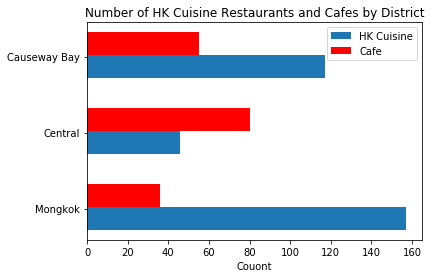

In [25]:
ax = plt.subplot(111)

y_pos=np.arange(len(df_HK_Cuisine['HK_Cuisine']))
ax.barh(y_pos, HK_Cuisine_Cnt, height=0.3,  align='center', label='HK Cuisine')
ax.barh(y_pos-0.3, Cafe_Cnt, height=0.3,  align='center', color='red', label='Cafe')


ax.set_yticks(y_pos-0.13)
ax.set_yticklabels(df_HK_Cuisine.index)
ax.set_xlabel('Couont')
ax.set_title('Number of HK Cuisine Restaurants and Cafes by District')
ax.invert_yaxis()
ax.legend()


plt.show()